<a href="https://colab.research.google.com/github/sunitha-18577/Python-Fundamentals/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
data=pd.read_csv('/content/zoo.csv')


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [ ]:
print(data.head())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [ ]:
print(data.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [ ]:
for column in data.select_dtypes(include=np.number).columns:
  data[column]=data[column].fillna(data[column].mean())

In [ ]:
for column in data.select_dtypes(include=np.number).columns:
  data[column]=data[column].fillna(data[column].mean())



In [ ]:
print(data.columns)

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [ ]:
print("Columns before dropping:")
print(data.columns)

Columns before dropping:
Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [ ]:
if 'animal name' in data.columns:
  x = data.drop('animal name', axis=1)
  y = data['animal name']
  print("Columns after dropping 'animal name':")
  print(x.columns)
else:
  print("'class_type' column not found. Please check the column names in your data.")



Columns after dropping 'animal name':
Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')


In [ ]:
if 'animal name' in data.columns:
  x = data.drop('animal name', axis=1)
  y = data['animal name']
else:
  print("'animal name ' column not found. Please check the column names in your data.")
  # Add a line to exit the script or raise an error if the column is missing
  # This prevents the next cell from trying to use undefined variables x and y
  raise ValueError("'animal name' column not found")


In [ ]:
data=pd.read_csv('/content/zoo.csv')

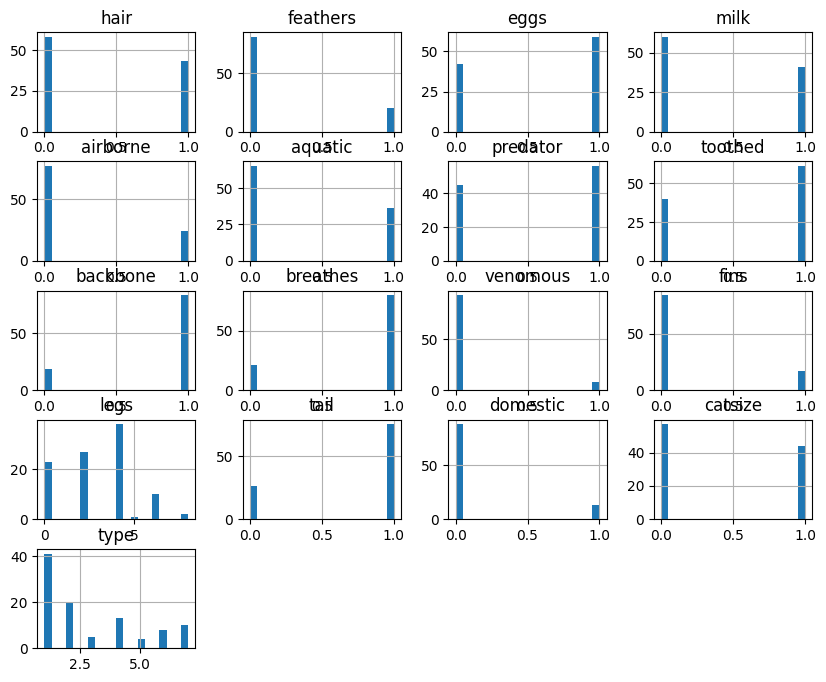

In [ ]:
data.hist(bins=20,figsize=(10,8))
plt.show()

In [ ]:
print("Columns in data DataFrame:")
print(data.columns)

Columns in data DataFrame:
Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


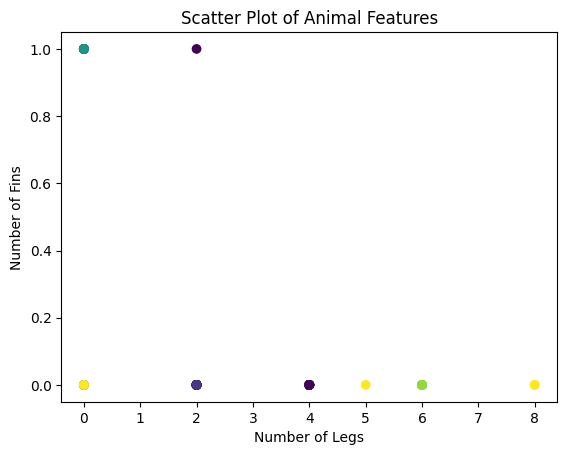

In [ ]:
plt.scatter(data['legs'], data['fins'], c=data['type'], cmap='viridis')
plt.xlabel('Number of Legs') # Update labels to be more descriptive
plt.ylabel('Number of Fins')
plt.title('Scatter Plot of Animal Features') # Update title
plt.show()


In [ ]:
numeric_means = data.select_dtypes(include=np.number).mean()


In [ ]:
data.fillna(numeric_means, inplace=True)


In [ ]:
numeric_data = data.select_dtypes(include=np.number)


In [ ]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]



<ipython-input-21-bbc941c8c51f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
x=data.drop('type',axis=1)
y=data['type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
if 'animal name' in data.columns:
  # Drop the 'animal name' column to create the feature set x
  x = data.drop('animal name', axis=1)
  # Define the target variable y (assuming 'type' is the target)
  y = data['type'] # Corrected to use 'type' as the target as per the subsequent code
  print("Columns after dropping 'animal name':")
  print(x.columns)
else:
  print("'animal name' column not found. Please check the column names in your data.")
  # Add a line to exit the script or raise an error if the column is missing
  # This prevents the next cell from trying to use undefined variables x and y
  raise ValueError("'animal name' column not found")



Columns after dropping 'animal name':
Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='weighted'))
print("Recall:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred,average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
if x_train.shape[1]==2:
  x_set,y_set=x_train.values,y_train.values
  x1,x2=np.meshgrid(np.arrange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arrange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
  plt.contourf(x1,x2,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
               alpha=0.75,cmap=ListedColormap(('red','green','blue')))
  plt.xlim(x1.min(),x1.max())
  plt.ylim(x2.min(),x2.max())
  for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
    plt.title('K-NN(Training set)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
else:
    print("Dicision boundary visualiztions is only appliable for 2D data.")


Dicision boundary visualiztions is only appliable for 2D data.


In [ ]:
if x_train.shape[1] == 2:
    print("Generating 2D decision boundary plot...")
    cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN Decision Boundary (Training data)")
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.show()
else:
    print(f"Decision boundary visualization is only applicable for 2D data. Your data has {x_train.shape[1]} features.")

Decision boundary visualization is only applicable for 2D data. Your data has 17 features.


In [ ]:
h=.02
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [ ]:
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


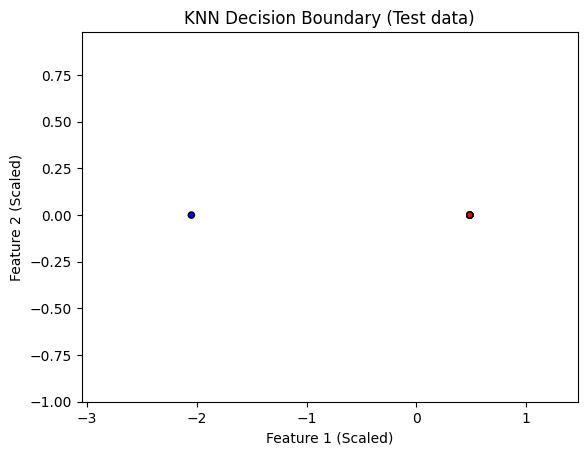

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Boundary (Test data)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

In [ ]:
print("\nInterview Questoions")
print("1.what are the key hyperparameters in knn")
print("    Key hyperparameters in knn are :\n\t-k(number of neighbours)\n\t-distance metric(e.g.,Euclidean,Manhattan,Minkowski)[15,16,17]\n\t-weights(uniform or distance)[14]")
print("2.what distance metrics can be used in knn?")
print("Common  distance metrics in knn include :\n\t-Education distance [15,16,17]\n\t-Manhattan distance [15,16]\n\t-Minkowski distance [15,16]")



Interview Questoions
1.what are the key hyperparameters in knn
    Key hyperparameters in knn are :
	-k(number of neighbours)
	-distance metric(e.g.,Euclidean,Manhattan,Minkowski)[15,16,17]
	-weights(uniform or distance)[14]
2.what distance metrics can be used in knn?
Common  distance metrics in knn include :
	-Education distance [15,16,17]
	-Manhattan distance [15,16]
	-Minkowski distance [15,16]
